In [54]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_iris()

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.shape

(150, 4)

In [6]:
df["species"] = data.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df.shape

(150, 5)

In [8]:
df["species"].unique()

array([0, 1, 2])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
x = df.drop("species", axis = 1)
y = df["species"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y,
                                                   random_state = 11)

In [12]:
print(x_train.shape, y_train.shape)

(105, 4) (105,)


In [13]:
print(x_test.shape, y_test.shape)

(45, 4) (45,)


In [14]:
mm = MinMaxScaler()
scaled_train = mm.fit_transform(x_train)
scaled_test = mm.transform(x_test)

In [15]:
model = keras.Sequential()

In [16]:
model.add(keras.layers.Dense(300, activation = "relu", input_shape = (4,)))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(30, activation = "relu"))
model.add(keras.layers.Dense(3, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           3,030 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,723 (135.64 KB)

 Trainable params: 34,723 (135.64 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [19]:
# 모델 훈련
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_test, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3490 - loss: 1.0791 - val_accuracy: 0.6889 - val_loss: 1.0271
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6643 - loss: 1.0176 - val_accuracy: 0.6667 - val_loss: 0.9664
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6368 - loss: 0.9586 - val_accuracy: 0.6667 - val_loss: 0.9098
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6639 - loss: 0.8997 - val_accuracy: 0.6667 - val_loss: 0.8491
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7004 - loss: 0.8326 - val_accuracy: 0.6667 - val_loss: 0.7820
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6490 - loss: 0.7662 - val_accuracy: 0.7333 - val_loss: 0.7126
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8116 - loss: 0.6933 - val_accuracy: 0.8889 - val_loss: 0.6411
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7374 - loss: 0.6285 - val_accuracy: 0.6889 - val_loss: 0.5792
E

In [20]:
model.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9199 - loss: 0.2853 


[0.29518336057662964, 0.9111111164093018]

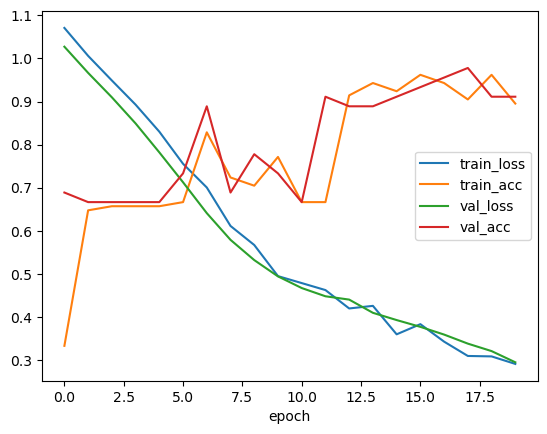

In [24]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 풀이

In [42]:
type(data)

sklearn.utils._bunch.Bunch

In [43]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
df["species"] = data.target

In [46]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
df["species"].map({0 : "setosa", 1 : "versico", 2 : "veiginica"})

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    veiginica
146    veiginica
147    veiginica
148    veiginica
149    veiginica
Name: species, Length: 150, dtype: object

In [49]:
df.shape

(150, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [53]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [55]:
np.unique(df["species"], return_counts = True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [56]:
x = df.drop("species", axis = 1)
y = df["species"]

In [57]:
y.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [58]:
x.shape

(150, 4)

In [59]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
x.iloc[0]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

In [61]:
# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation = "relu", input_shape = (4,)))
model.add(keras.layers.Dense(3, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
y.shape

(150,)

In [63]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2,
                                                   random_state =12)

In [65]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train,
                                             test_size = 0.2, random_state = 12)

In [67]:
model.fit(x_sub, y_sub, epochs = 50, validation_data = (x_val, y_val), batch_size = 4)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7699 - loss: 0.7431 - val_accuracy: 0.7917 - val_loss: 0.7481
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7556 - loss: 0.6918 - val_accuracy: 0.7917 - val_loss: 0.7108
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8929 - loss: 0.6268 - val_accuracy: 0.8333 - val_loss: 0.6761
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8964 - loss: 0.6215 - val_accuracy: 0.7917 - val_loss: 0.6458
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.5846 - val_accuracy: 0.7500 - val_loss: 0.6197
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8854 - loss: 0.5499 - val_accuracy: 0.8333 - val_loss: 0.5943
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.5258 - val_accuracy: 0.8333 - val_loss: 0.5710
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.5058 - val_accuracy: 0.8333 - val_loss:

- to_categorical() = sparse하게 변형시켜줌

In [70]:
endcoded_y = keras.utils.to_categorical(y)

In [71]:
endcoded_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, endcoded_y, stratify = endcoded_y, 
                                                    test_size = 0.2,
                                                   random_state =12)

In [75]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train,
                                             test_size = 0.2, random_state = 12)

In [76]:
y_val[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [77]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(16, activation = "relu", input_shape = (4,)))
model2.add(keras.layers.Dense(3, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model2.compile(loss = "categorical_crossentropy",
              optimizer = "adam", metrics = ["accuracy"])

In [80]:
model2.fit(x_sub, y_sub, epochs = 100, batch_size = 8, validation_data = (x_val, y_val))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1458 - loss: 2.4753 - val_accuracy: 0.0833 - val_loss: 2.2261
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0130 - loss: 2.0191 - val_accuracy: 0.0000e+00 - val_loss: 1.9164
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0050 - loss: 1.9378 - val_accuracy: 0.0000e+00 - val_loss: 1.6549
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1303 - loss: 1.6363 - val_accuracy: 0.2083 - val_loss: 1.4455
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3088 - loss: 1.3330 - val_accuracy: 0.3333 - val_loss: 1.2895
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4127 - loss: 1.2385 - val_accuracy: 0.6250 - val_loss: 1.1675
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5719 - loss: 1.1117 - val_accuracy: 0.5000 - val_loss: 1.0823
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4680 - loss: 1.0678 - val_accuracy: 0

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 0.4664 - val_accuracy: 0.8750 - val_loss: 0.4544
Epoch 52/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8890 - loss: 0.4287 - val_accuracy: 0.8750 - val_loss: 0.4508
Epoch 53/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.4272 - val_accuracy: 0.9167 - val_loss: 0.4442
Epoch 54/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9366 - loss: 0.4140 - val_accuracy: 0.9583 - val_loss: 0.4397
Epoch 55/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8933 - loss: 0.4251 - val_accuracy: 0.9583 - val_loss: 0.4361
Epoch 56/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9463 - loss: 0.3841 - val_accuracy: 0.9167 - val_loss: 0.4321
Epoch 57/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9194 - loss: 0.3916 - val_accuracy: 0.9167 - val_loss: 0.4291
Epoch 58/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9403 - loss: 0.3742 - val_accuracy: 0.9583 - val_lo